# Exercise: Linear Regression

<HR>

## Example 1:  
Source from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

### Load Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

### Load diabetes dataset (from scikit learn)

Note that this is a "toy dataset" provided by scikit learn for the sake of learning and examples. More can be read [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes).

In [7]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

### Split into training and testing

In [8]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

<font color="red">How many items do we have in our train dataset? How many in our test dataset?</font>

### Create linear regression model and train it

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Make predictions using the test set

In [25]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

### Print out information

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


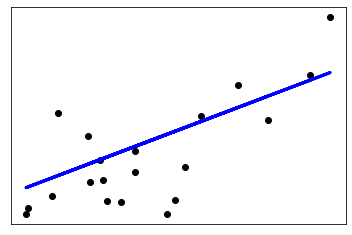

In [26]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<font color="red">What does the coefficient mean?</font>

<font color="red">What is mean squared error? (Here is a [resource](https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d) to help.)</font>

<font color="red">What is the coefficient of determination (here is a [resource](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html))? What does the value (0.47) mean here?</font>

<hr>

## Example 2

<font color="red">Before starting, answer: why do relationships matter? Give some examples.</font>

### Load housing data

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/dhyan6/data-science-projects/main/kc_house_data.csv')
df.head() # view our dataset after loading

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,98178
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,98125
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,98028
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,98136
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,98074


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


Some notes on features:  
- `sqft_living` is the square footage of an apartment's living space
- `sqft_lot` is the square footage of the land
- `condition` ranges between 1 to 5 and rates the condition of the apartment
- `grade` is a rating between 1 to 13 on the quality of the condition and desing
- `sqft_above` is the square footage of the interior space that is above ground level

<font color="red">Before we try to start modeling our data, it is important to have an understanding of it first. First, which features do you think will help us predict the price of a home and (very briefly) why? </font>

### Data understanding

Previously, we answered which features make the most sense to have a relationship. But it's a good idea to have the data speak for us. Let's take a look at correlation.

#### Correlation

<AxesSubplot:>

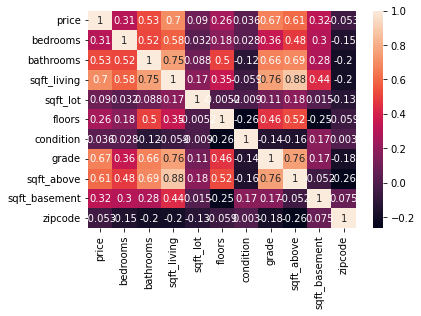

In [34]:
corr = df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

<font color="red">According to these correlations, which feature has the strongest relationship to price?</font>

<font color="red">What other features look like they have a relationship to price?</font>

**A note on correlation:**  
  
The above method, `df.corr()`, uses *Pearson correlation* by default. This measures the **linear correlation** between two variables X and Y. It can *only* evaluate a linear relationship between two variables. Since we will be working with linear regression in this example, this is good, as it will help us show which features help us predict `y` (or housing price).   
  
<font color="red">Take a look at the `df.corr` documentation (run the line below). Look at the different `method` options.</font>  
  
*Spearman's rank correlation* is another method which shows the **nonparametric measure of rank correlation** between two variables. In other words, it shows non linear relationships between two variables. More specifically, it shows the **monotonic relationship** (if one value increases or decreases as the other value increases, but not necessarily at a constant rate). You can read more about this [here](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8).

In [38]:
df.corr?

#### Visualizing relationships

<font color="red">Make a scatterplot showing the relationship between `price` and `sqft_living`.</font>

<font color="red">Very briefly describe this scatterplot.</font>

### Modeling

Now that we have a better idea of what our data looks like, we can get to modeling!

#### Experiment 1

First, let's see what our model looks like if we *only* use `sqft_living`.

In [62]:
# Define our features and target
X = df[['sqft_living']]
y = df['price']

# Split into train and test. By default, 75% of data is assigned to train, the other 25% to test.
x_train, x_test, y_train, y_test = train_test_split(X, y)

<font color="red">Write the code to: (1) initialize a linear regression model and (2) fit the model to our training data.</font>

In [63]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
# The coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [278.20807018]
Intercept: 
 -38420.709091203404


<font color="red">Looking at the coefficients above, what does this mean?</font>

<font color="red">Let's say we have a house with 1,200 square feet. Based on the coefficients above, about how much would this cost?</font>

<font color="red">Write the code snippet below to see what the model predicts: `lr.predict([[1200]])`</font>

### Evaluating Models

In the first example, we saw *Mean Squared Error* (MSE) used.

$$MSE={\sum \limits _{i=1} ^{n} \frac{(\hat{y_i}-y_i)^2}{n}}$$

Note that $\hat{y_i}$ is the prediction for an item or row $i$. $y_i$ is the actual value for row $i$.  
Think back to our last class and remember how we calculated the *sum of squares* for a line: $\sum (residual)^2$. The $residual$ was the difference between a data point and our line, which is the same as $\hat{y_i}-y_i$ above. And to calculate the *mean square error* (or average of the square errors), we divide by the number of $n$ rows total.

*Root Mean Squared Error* (RMSE) is another way to evaluate a linear regression model. We just take the MSE and take the square root of it:

$$RMSE=\sqrt{\sum \limits _{i=1} ^{n} \frac{(\hat{y_i}-y_i)^2}{n}}$$

Sci-kit learn documentation on: [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

<font color="red">Use the documentation above to write code finding the mean squared error of our model (don't forget to use our test dataset when evaluating!).</font>

<font color="red">After the above, also find the root mean squared error. (Note: you can use `np.sqrt(X)` to take the square root of X.)</font>

<font color="red">Discuss your results.

Also remember that we built this model with only one feature. To try to improve the model, you could experiment with adding new features as well.

Once you are done, submit this notebook file to Canvas.